In [ ]:
from tensorflow.keras.preprocessing.image import load_img  # Importing the load_img function to load images
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importing ImageDataGenerator for image data augmentation
from tensorflow.keras.preprocessing import image  # Importing the image module for image preprocessing tasks
from tensorflow.keras.optimizers import RMSprop  # Importing the RMSprop optimizer for training models
import tensorflow as tf  # Importing the TensorFlow library
import matplotlib.pyplot as plt  # Importing the Matplotlib library for plotting and visualization
import cv2  # Importing OpenCV for image processing tasks
import os  # Importing the OS module for interacting with the operating system
import numpy as np  # Importing NumPy for numerical computations

In [ ]:
cv2.imread("/content/drive/MyDrive/MED/Training/no/NORMAL2-IM-1317-0001.jpeg")

array([[[  0,   0,   0],
        [223, 223, 223],
        [227, 227, 227],
        ...,
        [235, 235, 235],
        [220, 220, 220],
        [208, 208, 208]],

       [[  0,   0,   0],
        [218, 218, 218],
        [217, 217, 217],
        ...,
        [223, 223, 223],
        [216, 216, 216],
        [206, 206, 206]],

       [[  0,   0,   0],
        [212, 212, 212],
        [211, 211, 211],
        ...,
        [225, 225, 225],
        [215, 215, 215],
        [208, 208, 208]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
training = ImageDataGenerator(rescale=1/255) #change this
validation =ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = training.flow_from_directory("/content/drive/MyDrive/MED/Training", target_size=(200,200),batch_size=3,class_mode="binary"
                                          )

val_dataset = training.flow_from_directory("/content/drive/MyDrive/Validation", target_size=(200,200),batch_size=3,class_mode="binary"
                                          )

Found 100 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'no': 0, 'yes': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# Create a Sequential model
model = tf.keras.models.Sequential([
    # First convolutional layer with 16 filters, a 3x3 kernel, ReLU activation, and input shape specified
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(200, 200, 3)),
    # First max pooling layer with a 2x2 window
    tf.keras.layers.MaxPool2D(2, 2),

    # Second convolutional layer with 32 filters and a 3x3 kernel, ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    # Second max pooling layer with a 2x2 window
    tf.keras.layers.MaxPool2D(2, 2),

    # Third convolutional layer with 64 filters and a 3x3 kernel, ReLU activation
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    # Third max pooling layer with a 2x2 window
    tf.keras.layers.MaxPool2D(2, 2),

    # Fourth convolutional layer with 128 filters and a 3x3 kernel, ReLU activation
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    # Fourth max pooling layer with a 2x2 window
    tf.keras.layers.MaxPool2D(2, 2),

    # Fifth convolutional layer with 256 filters and a 3x3 kernel, ReLU activation
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
    # Fifth max pooling layer with a 2x2 window
    tf.keras.layers.MaxPool2D(2, 2),

    # Flatten the output to feed into a Dense layer
    tf.keras.layers.Flatten(),

    # Fully connected Dense layer with 512 neurons and ReLU activation
    tf.keras.layers.Dense(512, activation="relu"),

    # Output layer with 1 neuron and sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation="sigmoid")     #sigmoid function->S(x) = 1 / (1 + e^(-x))
])


In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer =RMSprop(learning_rate=0.001),
              metrics =["accuracy"]


              )

In [ ]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=3,  # Corrected argument name  # total_samples / batch_size
    epochs=60,          # Corrected argument name
    validation_data=val_dataset
)


Epoch 1/60
3/3 [==============================] - 10s 4s/step - loss: 1.1471 - accuracy: 0.4444 - val_loss: 0.7128 - val_accuracy: 0.5000
Epoch 2/60
3/3 [==============================] - 3s 1s/step - loss: 0.7519 - accuracy: 0.4444 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/60
3/3 [==============================] - 3s 1s/step - loss: 0.7080 - accuracy: 0.4444 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/60
3/3 [==============================] - 3s 860ms/step - loss: 0.6942 - accuracy: 0.4444 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/60
3/3 [==============================] - 2s 785ms/step - loss: 0.6956 - accuracy: 0.2857 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/60
3/3 [==============================] - 2s 700ms/step - loss: 0.6936 - accuracy: 0.3333 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/60
3/3 [==============================] - 2s 729ms/step - loss: 0.6972 - accuracy: 0.1111 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/60
3/3 [============

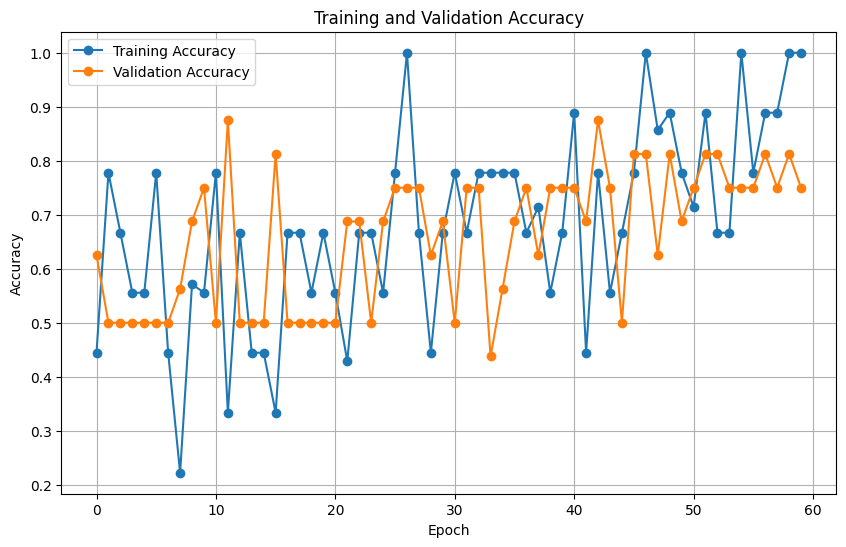

In [ ]:

# Extract training and validation accuracy values
training_accuracy = model_fit.history['accuracy']
validation_accuracy = model_fit.history['val_accuracy']

# Create a plot for accuracy
plt.figure(figsize=(10, 6))
plt.plot(training_accuracy, label='Training Accuracy', marker='o')
plt.plot(validation_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the directory containing the test images
test_directory = "/content/drive/MyDrive/Testing"

# Initialize a list to store the results for each image
results = []

# Recursively iterate through the directory and its subdirectories
for root, _, files in os.walk(test_directory):
    for file in files:
        # Construct the full path to the image
        image_path = os.path.join(root, file)

        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(200, 200))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img /= 255.0  # Normalize pixel values to the range [0, 1]

        # Make predictions using the loaded model
        prediction = model.predict(img)

        # Interpret the prediction
        if prediction >= 0.5:
            result = "Yes"  # Pneumonia is present
        else:
            result = "No"   # No pneumonia

        # Append the result to the results list
        results.append((image_path, result))

# Display the results for each image
for image_path, result in results:
    print(f"Image {image_path}: Presence of pneumonia: {result}")



1/1 [==============================] - 0s 37ms/step
Image /content/drive/MyDrive/Testing/yes/person91_bacteria_447.jpeg: Presence of pneumonia: Yes
Image /content/drive/MyDrive/Testing/yes/person93_bacteria_453.jpeg: Presence of pneumonia: Yes
Image /content/drive/MyDrive/Testing/yes/person91_bacteria_448.jpeg: Presence of pneumonia: Yes
Image /content/drive/MyDrive/Testing/yes/person92_bacteria_450.jpeg: Presence of pneumonia: Yes
Image /content/drive/MyDrive/Testing/yes/person91_bacteria_449.jpeg: Presence of pneumonia: Yes
Image /content/drive/MyDrive/Testing/yes/person93_bacteria_454.jpeg: Presence of pneumonia: Yes
Image /content/drive/MyDrive/Testing/yes/person91_bacteria_446.jpeg: Presence of pneumonia: Yes
Image /content/drive/MyDrive/Testing/yes/person92_bacteria_451.jpeg: Presence of pneumonia: Yes
Image /content/drive/MyDrive/Testing/no/NORMAL2-IM-0359-0001.jpeg: Presence of pneumonia: Yes
Image /content/drive/MyDrive/Testing/no/NORMAL2-IM-0360-0001.jpeg: Presence of pneumon